# 3. Train a Multi-Layer perceptron 
Use the cross-entropy loss with l2 regularization (weight decay penalty). 
In other words, the activation function equals the logistic function.

- Plot curves of the training and validation error as a function of the penalty strength α. 
- How do the curves behave?
- Explain why.

Advice: use a logaritmic range for parameter α and a sufficiently large number of model parameters.
***************************************

#Ridge Regression:
In general, a regularization term is introduced to a loss/cost function, A model which uses L2 regularization is called Ridge Regression and adds “squared magnitude” of coefficient as penalty term to the loss function(weight decay penalty). It adds penalty equivalent to square of the magnitude of coefficients. The minimization objective = Least Squares Objective + α * (sum of square of coefficients), where 'Least squares objective’ = the linear regression objective without regularization. 

The aim is to penalize weights with a large magnitude as capacity is bounded by the magnitude of the weights of the neural network. It is called L2 regularization because it minimizes the "L2 norm" of the parameters. Sometimes this is applied only to the weights and not to biases. L2-norm csn be used for regularization, or as a loss function and is also known as least squares. It is basically minimizing the sum of the square of the differences (S) between the target value (Yi) and the estimated values f(xi). The L2 regularization has the intuitive interpretation of heavily penalizing peaky weight vectors and preferring diffuse weight vectors. Due to multiplicative interactions between weights and inputs this has the effect of encouraging the network to use all of its inputs a little rather than some of its inputs a lot. L2 Regularization can be used used to address over-fitting and feature selection. 


#Cross-entropy loss: 
Cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a loss of 0.


In [7]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot, animation, rcParams
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

In [8]:
#https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

# Pick a classification dataset, load the file and read the labels in Y and data in X
X, Y = load_svmlight_file('diabetes_scale.svm')

# Split the data twice so we can run two tests, each on different data
# The training set is used to fit the models; 
# The validation set is often used to tune hyper-parameters and to estimate prediction error for model selection;
# The test set is used for assessment of the generalization error of the final chosen model.
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)



In [6]:
# MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
# MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
# MLP is sensitive to feature scaling.
#    activation: Activation function for the hidden layer. "logistic"  = the logistic sigmoid function.
#                                                                       f(x) = 1 / (1 + exp(-x)).
#    learning_rate: 'constant'
#    max_iter : int, optional, default 200
#    tol : float, optional, default 1e-4
#    solver: The solver for weight optimization. ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
#    alpha : L2 penalty (regularization term) parameter.

alpha_ridge = np.geomspace(1e-15, 1e+15, 20)

#train_scores, valid_scores = validation_curve(MLPClassifier(activation='logistic', hidden_layer_sizes=(100,), learning_rate='adaptive',
#                learning_rate_init=0.1, max_iter=500, random_state=1,
#                 solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
#                 warm_start=False), X, Y,'alpha',alpha_ridge,cv=5)

train_scores, valid_scores = validation_curve(MLPClassifier(activation='logistic',
                 max_iter=500, solver='lbfgs', verbose=True), X, Y,'alpha',alpha_ridge,cv=5)
    
print(train_scores.shape)
print(valid_scores.shape)
print(alpha_ridge.shape)


(20, 5)
(20, 5)
(20,)


/Users/aideenf/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


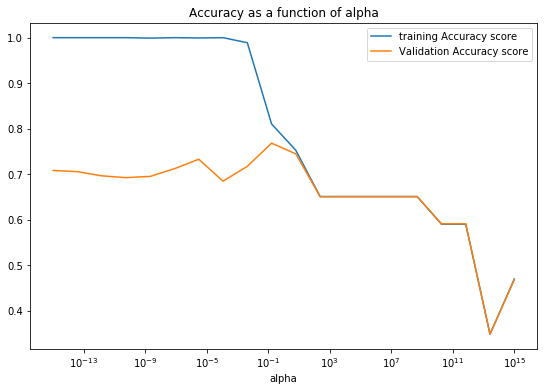

In [10]:

plt.figure(figsize=(20, 6))


plt.subplot(122)
ax = plt.gca()
ax.plot(alpha_ridge, train_scores.mean(axis=1),label='training Accuracy score')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.title('Accuracy as a function of alpha')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alpha_ridge, valid_scores.mean(axis=1),label='Validation Accuracy score')
ax.set_xscale('log')
plt.axis('tight')

plt.legend()
plt.show()

/Users/aideenf/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


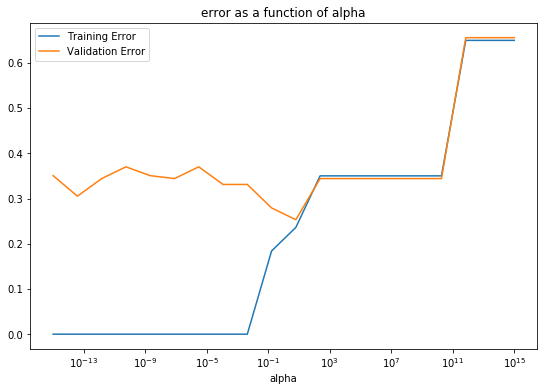

In [13]:
errors_train = []
errors_test = []
scores_test = []
scores_train = []

for a in alpha_ridge:
    clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(100,), max_iter=500, random_state=1,
                solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
                warm_start=False, alpha=a)

    #plot training and validation error as function of the penalty strength
    clf.fit(X_train, Y_train)
    train_predict = clf.predict(X_train)
    score = clf.score(X_train, Y_train)
    errors_train.append(1-score)
    scores_train.append(score)
    test_predict = clf.predict(X_test,)
    score_test = clf.score(X_test, Y_test)
    errors_test.append(1-score_test)
    scores_test.append(score_test)
    
plt.figure(figsize=(20, 6))
plt.subplot(122)
ax = plt.gca()
ax.plot(alpha_ridge, errors_train ,label='Training Error ')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.title('error as a function of alpha')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alpha_ridge, errors_test, label='Validation Error')
ax.set_xscale('log')
plt.axis('tight')

plt.legend()
plt.show()

RESULTS:
    
- How does the graph behave:
    * When alpha is in the lower range there is a significant difference between the training and validation error/accuracy, as alpha increase the accuracy(error) begins to converge and flatten, however as alpha increases further the accuracy of both training and validation decreases signifcantly(the error increases for both). There is
an area where we can see a flat/optimal spot. 


- Why:
    - In the region where the training accuracy and validation accuracy are significantly different with the training accuracy staying high(error low) and validation accuracy low(error higher than training data)we are seeing the effects of high variance. The training accuracy is high because we are overfitting the data and learning too much from the training examples, but the validation accuracy is lower(error higher) because our model isn't able to generalise from the training data to new data.

    - When alpha incerases we reach a region where both the training accuracy and validation accuracy are low(errors high and increasing) this may mean the model may be subject to high bias. It was not able to learn from the data and it performing poorly/underfitting. 
    
    - The area in both graphs (the validation curve graph) and the training/validation error as function of alpha we can find the optimal spot between underfitting and overfitting in order to build our model which will generalizes well.
    
    - As the value of alpha increases, the model complexity reduces, higher values of alpha reduce overfitting significantly high values can cause underfitting.

    * The effect of α:
        - α = 0: The objective becomes same as simple linear regression. We’ll get the same coefficients as simplelinear regression.
        - α = ∞:The coefficients will be zero. Because of infinite weightage on square of coefficients.
        
        - 0 < α < ∞: The magnitude of α will decide the weightage given to different parts of objective.


# 